# Anaylsis of the Training Data

In [43]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
import numpy as np
from collections import Counter

In [44]:
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded_5000.csv')
original_df = pd.read_csv('data/OsmoticStress_with_binary_positions.csv')
original_excel = pd.read_excel('data/OsmoticStress.xlsx')

## Adding the whole protein sequences to the data

In [ ]:

from Bio import SeqIO

def read_fasta_to_dict(file_path):
    sequences = {}
    for record in SeqIO.parse(file_path, "fasta"):
        uniprot_id = record.id.split('|')[1]
        sequences[uniprot_id] = str(record.seq)
    return sequences

fasta_file_path = 'data/UP000002311_559292.fasta'
sequences = read_fasta_to_dict(fasta_file_path)

original_excel["full_sequence"] = original_excel['Uniprot_ID'].map(sequences)
original_excel["full_sequence"] = original_excel["full_sequence"].astype(str)
original_excel.shape

(32709, 13)

In [ ]:
print("Total number of proteins:", len(original_excel['Uniprot_ID'].unique()))

Total number of proteins: 2746


In [ ]:
print("The number of proteins used for training:", len(df['Uniprot_ID'].unique()))

The number of proteins used for training: 1490


## Distribution of the Training Data and the Whole Unused Data

In [ ]:
indexs = df.sort_values(by=['index'],ascending=False)
print(original_excel.shape)

unused_data = original_excel.drop(indexs['index'] , axis=0)
print(unused_data.shape)

(32709, 13)
(27709, 13)


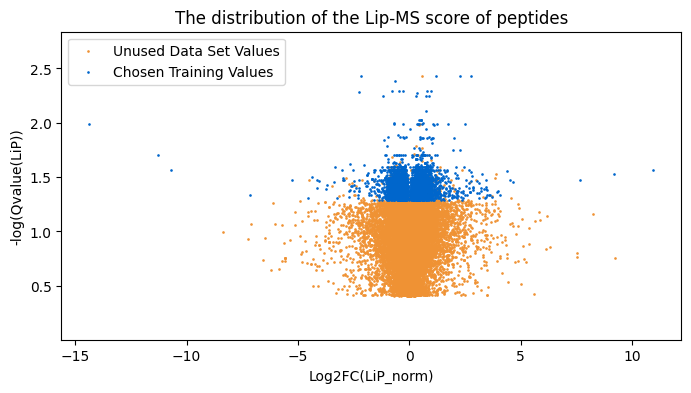

In [ ]:
fig = pp.figure(figsize=(8, 4))
pp.tight_layout()
pp.margins(y=0.2)
pp.scatter(y=unused_data['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=unused_data['Log2FC(LiP_norm)'],s=0.8, color='#EF9234')
pp.scatter(y=df['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=df['Log2FC(LiP_norm)'],s=0.8, color='#06C')
pp.xlabel("Log2FC(LiP_norm)")
pp.ylabel("-log(Qvalue(LiP))")
pp.legend(["Unused Data Set Values" , "Chosen Training Values"])
pp.title('The distribution of the Lip-MS score of peptides')
pp.show()

## Distribution of the Training Data and the Trimmed Unused Data
**Trimmed based on their protein sequence length**

In [ ]:

trimmed_unused_original = original_excel[original_excel['full_sequence'].apply(lambda x: len(x)) < 1000]
trimmed_unused_original = trimmed_unused_original.sort_values(by=['Qvalue(LiP)'],ascending=True)
print(trimmed_unused_original.shape)
trimmed_original = trimmed_unused_original.iloc[5000:,:]

(28008, 13)


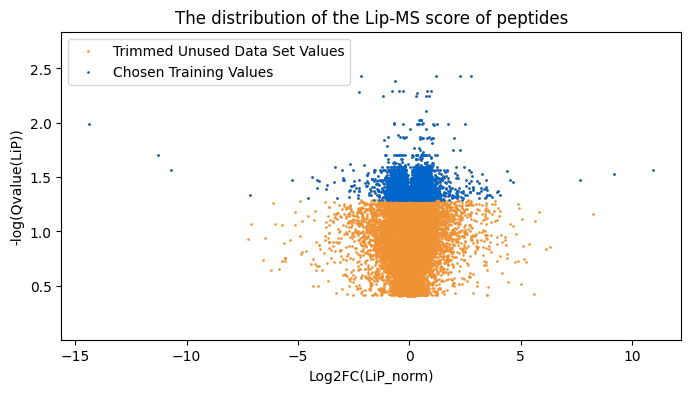

In [ ]:

fig = pp.figure(figsize=(8, 4))
pp.tight_layout()
pp.margins(y=0.2)
pp.scatter(y=trimmed_unused_original['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=trimmed_unused_original['Log2FC(LiP_norm)'],s=0.8, color='#EF9234')
pp.scatter(y=df['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=df['Log2FC(LiP_norm)'],s=0.8, color='#06C')
pp.xlabel("Log2FC(LiP_norm)")
pp.ylabel("-log(Qvalue(LiP))")
pp.legend(["Trimmed Unused Data Set Values" , "Chosen Training Values"])
pp.title('The distribution of the Lip-MS score of peptides')
pp.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
pdf_file_path = './data/training-data-distribution.pdf'
with PdfPages(pdf_file_path) as pdf:
    pdf.savefig(fig)
pp.close()

## Distribution of the Training Data

Text(0.5, 1.0, 'Distribution of the training data')

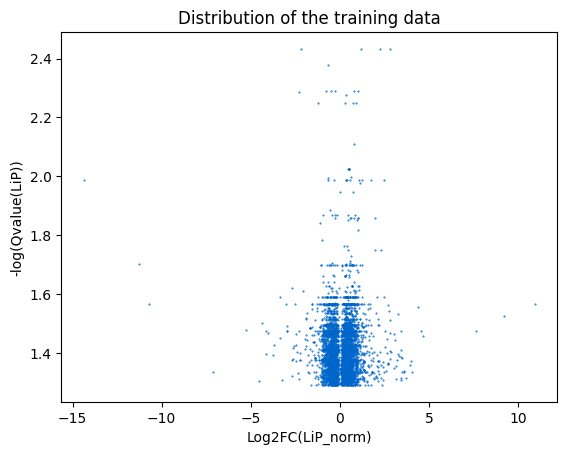

In [ ]:
pp.scatter(y=df['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=df['Log2FC(LiP_norm)'],s=0.2, color='#06C')
pp.xlabel("Log2FC(LiP_norm)")
pp.ylabel("-log(Qvalue(LiP))")
pp.title('Distribution of the training data')

## Distribution of the Lip-MS scores of the training peptides

In [ ]:
scores = df["Log2FC(LiP_norm)"]
var_lip_scores = np.var(scores)
std_lip_scores = np.std(scores)
mean_lip_scores = np.mean(scores)
print("The variance of the Log2FC(LiP_norm)", var_lip_scores)
print("The standard deviation of the Log2FC(LiP_norm)", std_lip_scores)
print("The mean of the Log2FC(LiP_norm)", mean_lip_scores)

The variance of the Log2FC(LiP_norm) 0.6789418855449596
The standard deviation of the Log2FC(LiP_norm) 0.8239792992211392
The mean of the Log2FC(LiP_norm) 0.050456824953845125


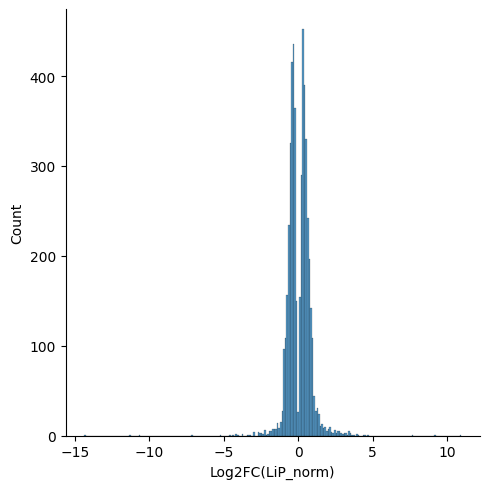

In [ ]:
scores = df["Log2FC(LiP_norm)"]
sns.displot(df, x = "Log2FC(LiP_norm)")

## Comparing the Unused Data and Training Data Around The Lip-MS Score 0

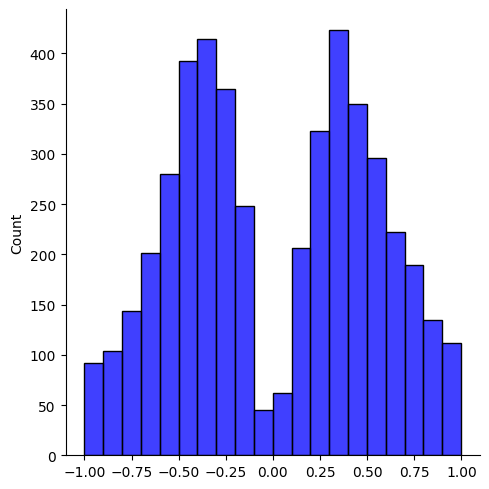

In [ ]:
training_close_zero = list(filter( lambda x : np.abs(x)<1 ,df["Log2FC(LiP_norm)"]))
sns.displot(training_close_zero, color = 'blue')

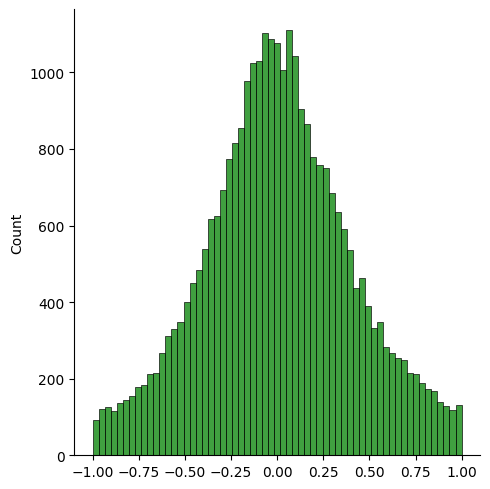

In [ ]:
unused_close_zero = list(filter( lambda x : np.abs(x)<1 ,original_excel["Log2FC(LiP_norm)"]))
sns.displot(unused_close_zero, color='green')
